# 02d - TS2 Skeletonization

## Setup

In [1]:
from discos import *
import numpy as np
import trimesh

import logging
logging.basicConfig(level=logging.INFO)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Load TS2 Mesh

In [2]:
# Load the TS2 mesh from the data directory
mesh_path = data_path("mesh/raw/TS2_alone.obj")

ts = trimesh.load(mesh_path)

mm = MeshManager(mesh=ts)
mm.repair_mesh()
mm.align_furthest_points_with_z()
mm.print_mesh_analysis()
mm.visualize_mesh_slice_interactive()


INFO:discos.mesh:Mesh Repair Summary:
INFO:discos.mesh:  • Inverted faces to fix negative volume: -3199890.36 → 3199890.36
INFO:discos.mesh:  • Successfully filled holes - mesh is now watertight
INFO:discos.mesh:  • Applied final mesh processing and validation
INFO:discos.mesh:
Final Mesh Status:
INFO:discos.mesh:  • Volume: 3764800.466500009
INFO:discos.mesh:  • Watertight: True
INFO:discos.mesh:  • Winding consistent: True
INFO:discos.mesh:  • Faces: 2008
INFO:discos.mesh:  • Vertices: 1004
INFO:discos.mesh:Mesh Analysis Report
INFO:discos.mesh:====================
INFO:discos.mesh:
Geometry:
INFO:discos.mesh:  * Vertices: 1004
INFO:discos.mesh:  * Faces: 2008
INFO:discos.mesh:  * Components: 1
INFO:discos.mesh:  * Volume: 3764800.47
INFO:discos.mesh:  * Bounds: [8696.3, 2707.0, 2250.0] to [8918.9, 2919.8, 2814.3]
INFO:discos.mesh:
Mesh Quality:
INFO:discos.mesh:  * Watertight: True
INFO:discos.mesh:  * Winding Consistent: True
INFO:discos.mesh:  * Normal Direction: outward
INFO:disc

In [3]:
# save repaired mesh to new file
mm.save(data_path("mesh/processed/TS2_repaired.obj"), file_format="obj")

## Skeleton

INFO:discos.skeleton:Starting skeletonization: n_slices=21, radius_mode=equivalent_area, validate_volume=True, volume_tol=0.050
INFO:discos.skeleton:Constructed cross-sections: 22 cuts, 24 total junctions
INFO:discos.skeleton:Volume check OK: bands=3.7648e+06, mesh=3.7648e+06, rel_err=0.000%


<Axes: xlabel='x (horizontal)', ylabel='z (vertical)'>

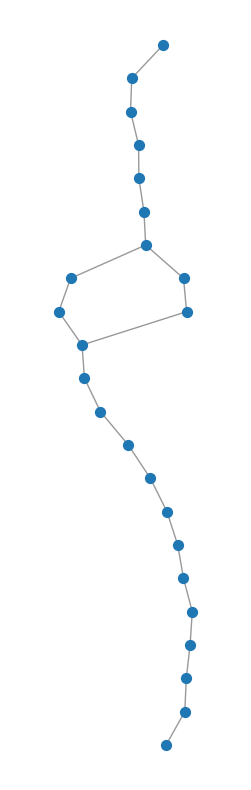

In [4]:
n_slices = 21
G = skeletonize(mm, n_slices=n_slices, verbosity=2, enforce_connected=False)
G.draw(figsize=(10, 10))

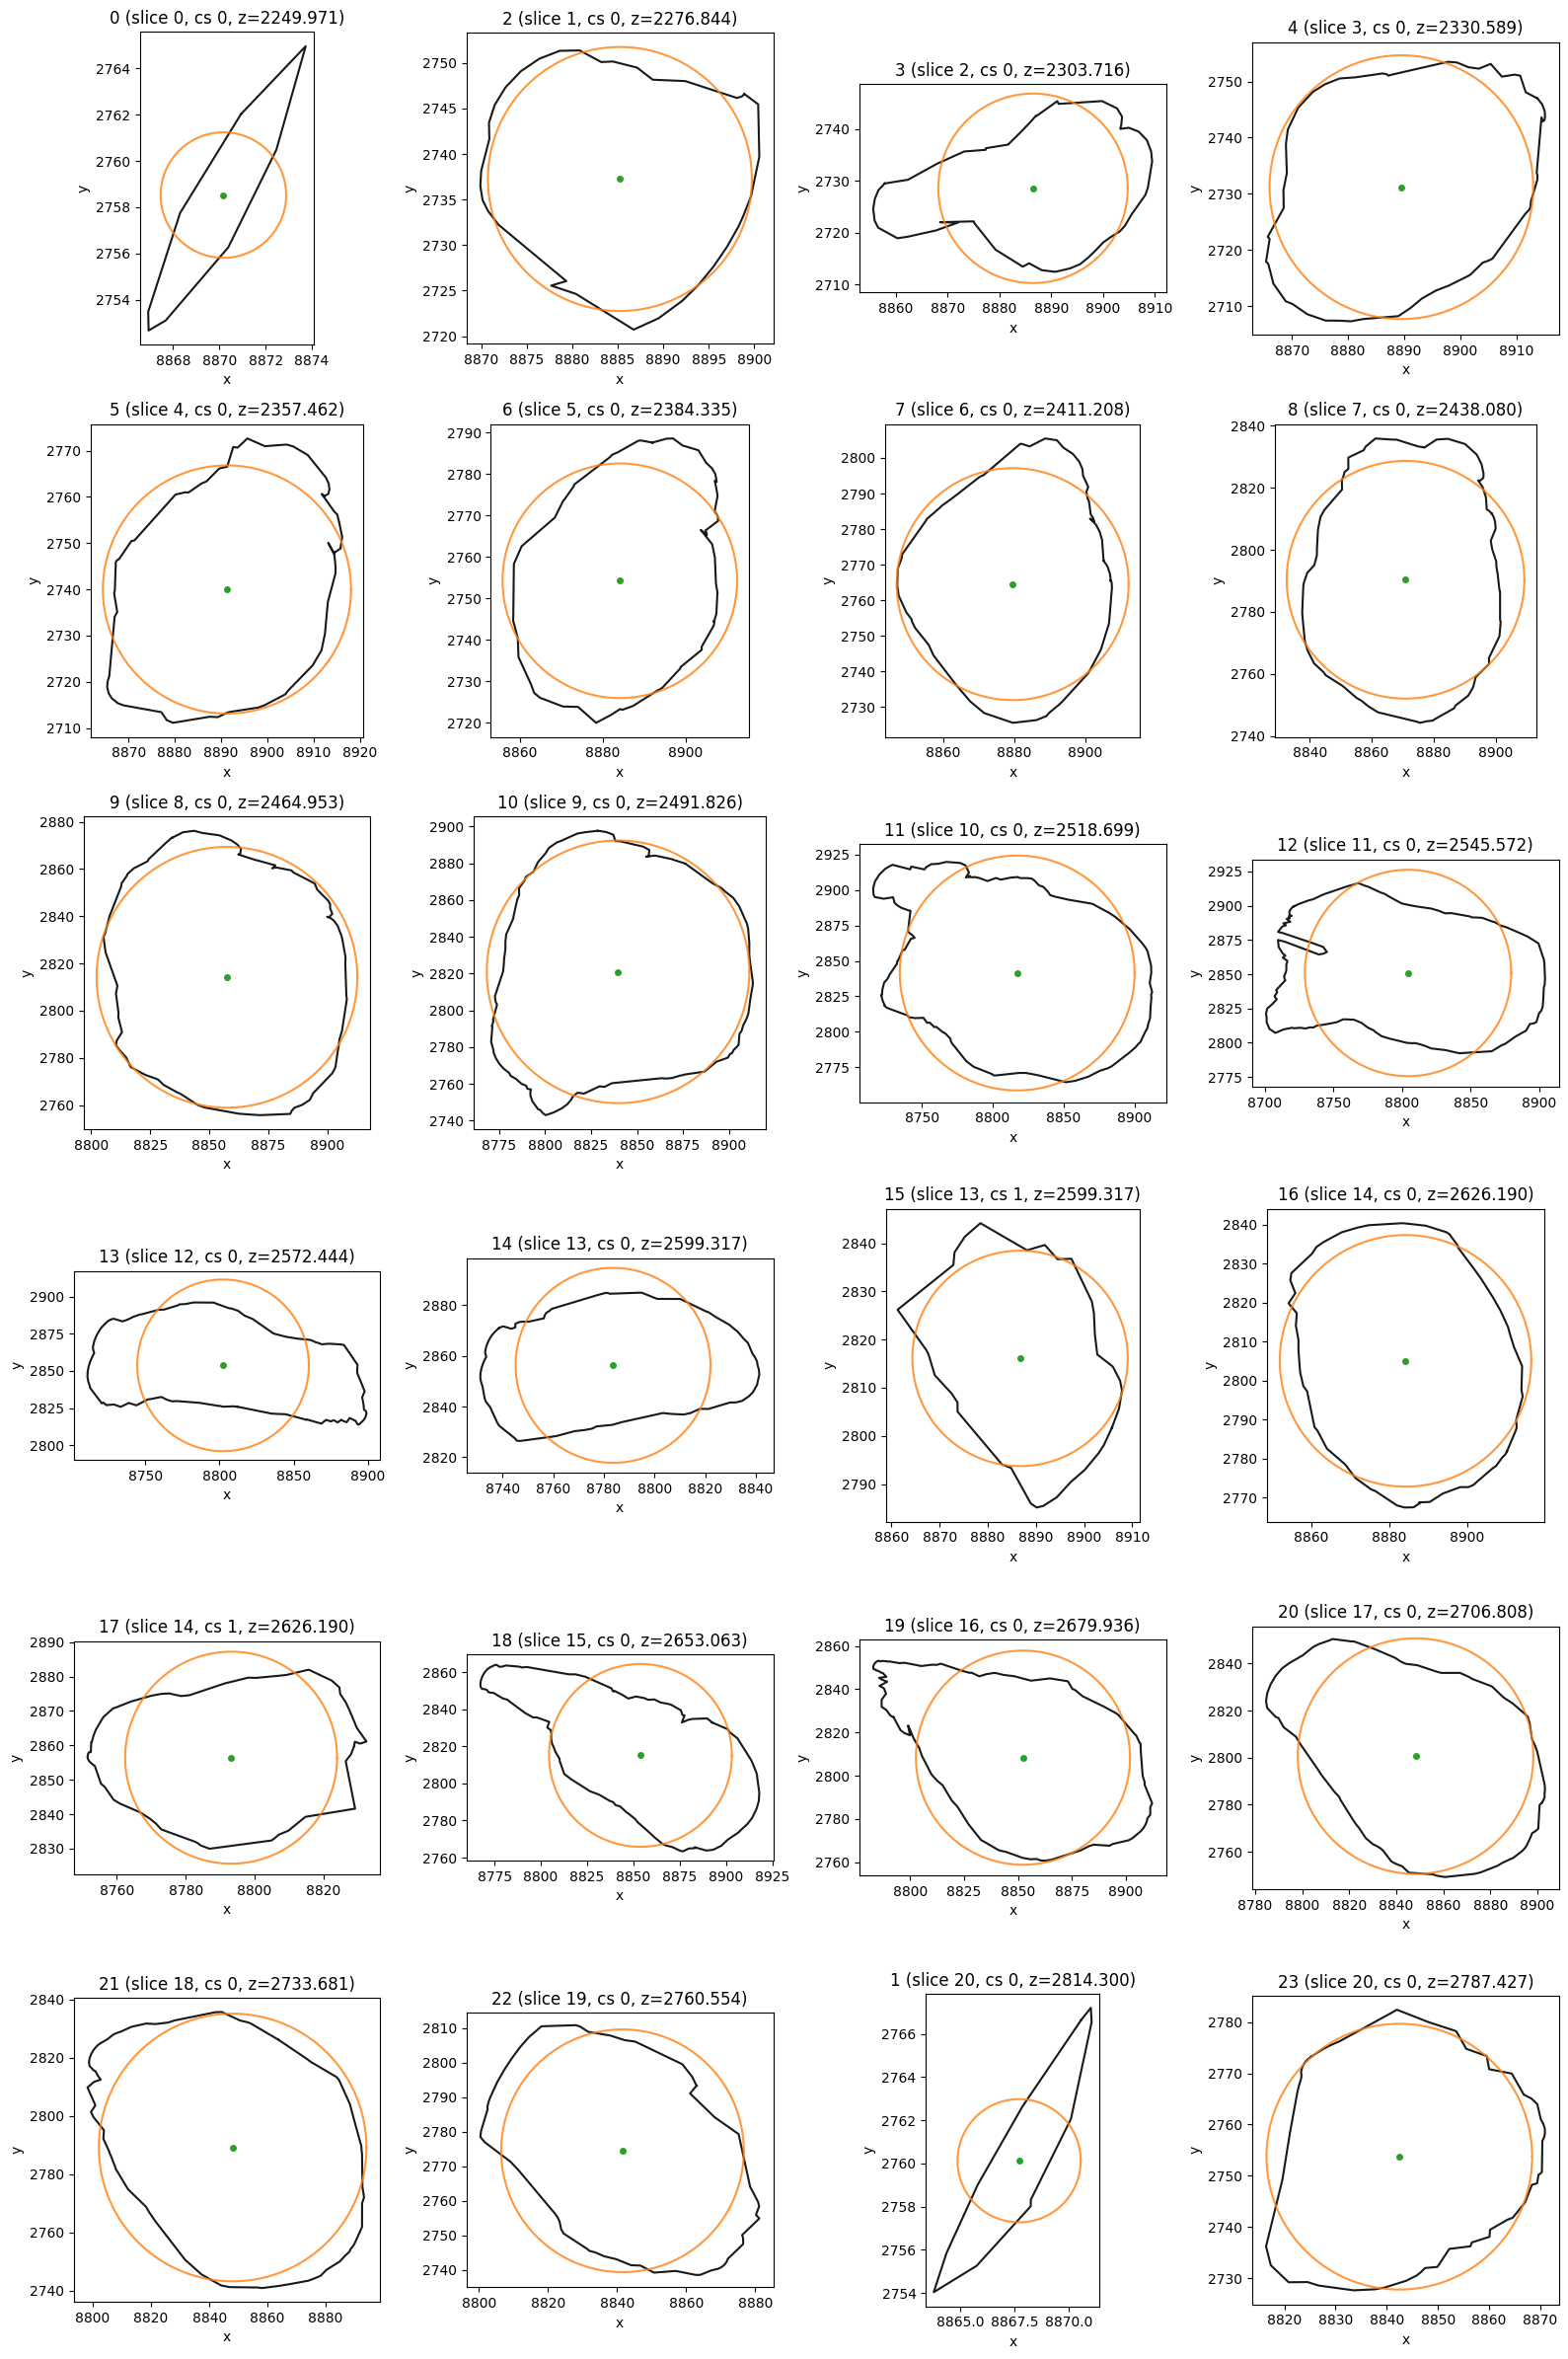

In [5]:
G.plot_all_cross_sections();

In [6]:
# write swc to file
G.to_swc(data_path(f"swc/TS2_n{n_slices}.swc"), cycle_mode="duplicate_junction")